# Machine Learning Project

In [2]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
from PIL import Image
import os

## loading samples

In [113]:
path = './NonsegmentedV2/'
samples = ['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed',"Shepherd’s Purse",'Small-flowered Cranesbill','Sugar beet']
# rescale every image to target small size to reduce time for extraction and number of features
size = (128,128)
# used once to add first image to the list
counter = 0
# lists for features and corresponding values
sample_per_plant = 250      #limiting sample size for each plant since some have almost 3 times as many images provided
X = []
y = np.array([])

In [114]:
# loading data into arrays
for sample in samples:
    files = os.listdir(path + sample)
    ind = samples.index(sample)
    for i in range(sample_per_plant):
        if not files[i].endswith('.png'):
            continue
        im = Image.open(path + sample + '/' + files[i]).resize(size)
        if not counter:
            X = [np.asarray( im, dtype="int32" )[:,:,:3].flatten()]
            counter = 1
        else:
            X = np.append(X, [np.asarray( im, dtype="int32" )[:,:,:3].flatten()], axis=0)
        y = np.append(y, ind)
        im.close()

In [115]:
# scaler for the features
X_scale = StandardScaler().fit(X)

## Separating samples into training and test sets

In [116]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15)

In [6]:
print(X_train.shape)

(2166, 12288)


# 1) Logistic Regression


In [25]:
c = [0.00000001,0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]

## 1.1) normal features

### No regularization

In [117]:
X_train1 = X_scale.transform(X_train)
X_val1 = X_scale.transform(X_val)

In [118]:
log = LogisticRegression(penalty='none', solver='lbfgs', max_iter=200)
log.fit(X_train1, y_train)

LogisticRegression(max_iter=200, penalty='none')

In [119]:
print('train:',log.score(X_train1, y_train))
print('validation:', log.score(X_val1, y_val))

train: 1.0
validation: 0.4073107049608355


### L1 Regularization

In [120]:
trainAcc_l1 = []
valAcc_l1 = []

In [121]:
for i in c:
    log_l1 = LogisticRegression(penalty='l1', C=i, solver='liblinear', max_iter=200)
    log_l1.fit(X_train, y_train)
    trainAcc_l1.append(log_l1.score(X_train1, y_train))
    valAcc_l1.append(log_l1.score(X_val1, y_val))

In [122]:
print(trainAcc_l1)
print(valAcc_l1)

[0.07663896583564174, 0.07663896583564174, 0.4967682363804247, 0.9930747922437673, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.09399477806788512, 0.09399477806788512, 0.2898172323759791, 0.4464751958224543, 0.4046997389033943, 0.4046997389033943, 0.402088772845953, 0.402088772845953, 0.3681462140992167, 0.370757180156658]


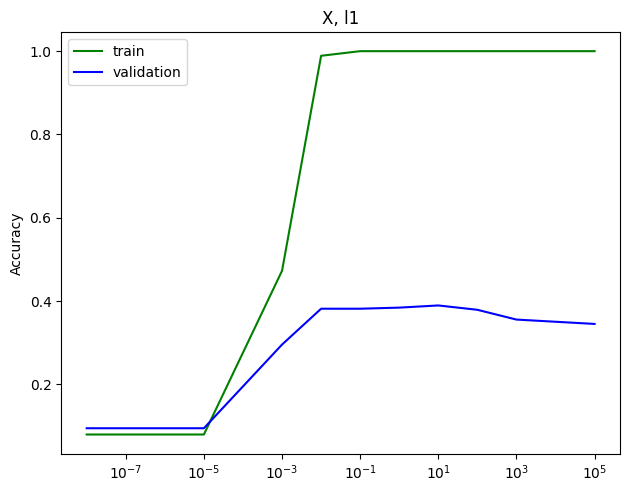

In [135]:
plt.plot(c, trainAcc_l1, label='train', color='g')
plt.plot(c, valAcc_l1, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X, l1')
plt.legend()

### L2 Regularization

In [123]:
trainAcc_l2 = []
valAcc_l2 = []

In [ ]:
for i in c:
    log_l2 = LogisticRegression(penalty='l2', C=i, solver='lbfgs', max_iter=200)
    log_l2.fit(X_train, y_train)
    trainAcc_l2.append(log_l2.score(X_train1, y_train))
    valAcc_l2.append(log_l2.score(X_val1, y_val))

In [125]:
print(trainAcc_l2)
print(valAcc_l2)

[0.6084949215143121, 0.9007386888273314, 0.8231763619575254, 0.8060941828254847, 0.8051708217913204, 0.804247460757156, 0.8033240997229917, 0.8130193905817175, 0.8088642659279779, 0.8167128347183749]
[0.4177545691906005, 0.4073107049608355, 0.4177545691906005, 0.4073107049608355, 0.4046997389033943, 0.39947780678851175, 0.39425587467362927, 0.4073107049608355, 0.39947780678851175, 0.402088772845953]


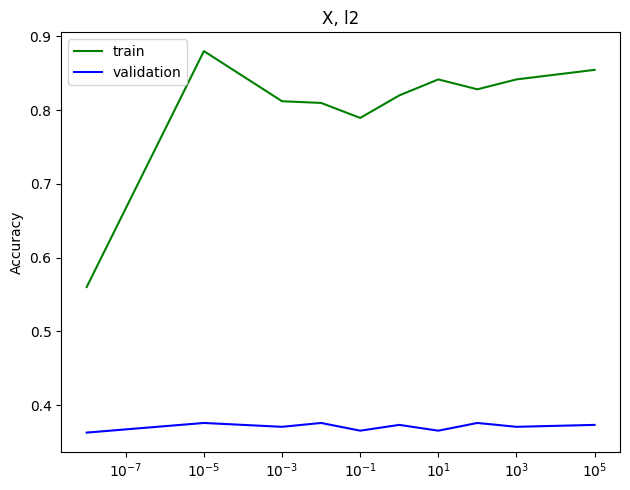

In [132]:
plt.plot(c, trainAcc_l2, label='train', color='g')
plt.plot(c, valAcc_l2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X, l2')
plt.legend()

## 1.2) squared features

In [126]:
X_train2 = np.square(X_train)
X_train2 = X_scale.transform(X_train2)
X_val2 = np.square(X_val)
X_val2 = X_scale.transform(X_val2)

### L1 Regularization

In [127]:
trainAcc2_l1 = []
valAcc2_l1 = []

In [128]:
for i in c:
    log2_l1 = LogisticRegression(penalty='l1', C=i, solver='liblinear', max_iter=200)
    log2_l1.fit(X_train2, y_train)
    trainAcc2_l1.append(log2_l1.score(X_train2, y_train))
    valAcc2_l1.append(log2_l1.score(X_val2, y_val))

In [129]:
print(trainAcc2_l1)
print(valAcc2_l1)

[0.07663896583564174, 0.27146814404432135, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.09399477806788512, 0.14882506527415143, 0.360313315926893, 0.34464751958224543, 0.33159268929503916, 0.32114882506527415, 0.32114882506527415, 0.3028720626631854, 0.30548302872062666, 0.29765013054830286]


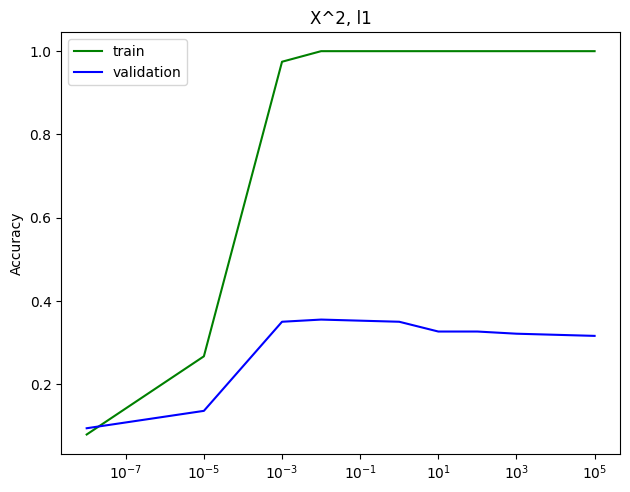

In [138]:
plt.plot(c, trainAcc2_l1, label='train', color='g')
plt.plot(c, valAcc2_l1, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^2, l1')
plt.legend()

### L2 Regularization

In [130]:
trainAcc2_l2 = []
valAcc2_l2 = []

In [ ]:
for i in c:
    log2_l2 = LogisticRegression(penalty='l2', C=i, solver='lbfgs', max_iter=200)
    log2_l2.fit(X_train2, y_train)
    trainAcc2_l2.append(log2_l2.score(X_train2, y_train))
    valAcc2_l2.append(log2_l2.score(X_val2, y_val))

In [132]:
print(trainAcc2_l2)
print(valAcc2_l2)

[0.9584487534626038, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.38903394255874674, 0.35509138381201044, 0.3472584856396867, 0.3368146214099217, 0.3263707571801567, 0.33159268929503916, 0.33159268929503916, 0.3368146214099217, 0.32114882506527415, 0.3237597911227154]


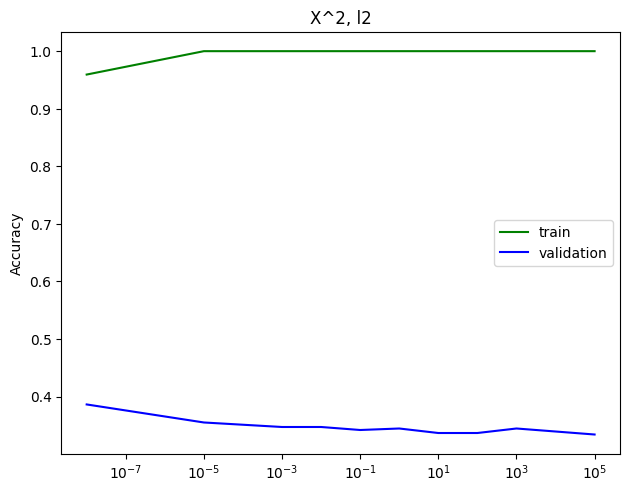

In [140]:
plt.plot(c, trainAcc2_l2, label='train', color='g')
plt.plot(c, valAcc2_l2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^2, l2')
plt.legend()

## 1.3) cubic features

In [133]:
X_train3 = X_train**3
X_train3 = X_scale.transform(X_train3)
X_val3 = X_val**3
X_val3 = X_scale.transform(X_val3)

### L1 Regularization

In [134]:
trainAcc3_l1 = []
valAcc3_l1 = []

In [135]:
for i in c:
    log3_l1 = LogisticRegression(penalty='l1', C=i, solver='liblinear', max_iter=200)
    log3_l1.fit(X_train3, y_train)
    trainAcc3_l1.append(log3_l1.score(X_train3, y_train))
    valAcc3_l1.append(log3_l1.score(X_val3, y_val))

In [136]:
print(trainAcc3_l1)
print(valAcc3_l1)

[0.07663896583564174, 0.981994459833795, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.09399477806788512, 0.31070496083550914, 0.2793733681462141, 0.2793733681462141, 0.26109660574412535, 0.2793733681462141, 0.27154046997389036, 0.2558746736292428, 0.27154046997389036, 0.2689295039164491]


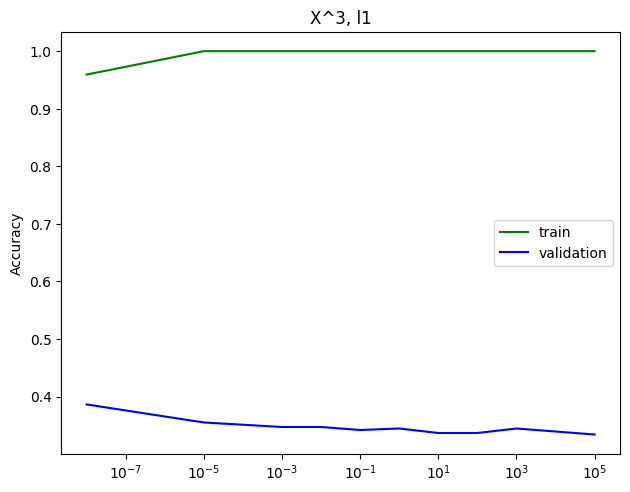

In [142]:
plt.plot(c, trainAcc2_l2, label='train', color='g')
plt.plot(c, valAcc2_l2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^3, l1')
plt.legend()

### L2 Regularization

In [137]:
trainAcc3_l2 = []
valAcc3_l2 = []

In [ ]:
for i in c:
    log3_l2 = LogisticRegression(penalty='l2', C=i, solver='lbfgs', max_iter=200)
    log3_l2.fit(X_train3, y_train)
    trainAcc3_l2.append(log3_l2.score(X_train3, y_train))
    valAcc3_l2.append(log3_l2.score(X_val3, y_val))

In [139]:
print(trainAcc3_l2)
print(valAcc3_l2)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.3028720626631854, 0.30548302872062666, 0.2845953002610966, 0.28720626631853785, 0.2924281984334204, 0.2898172323759791, 0.28720626631853785, 0.2898172323759791, 0.2845953002610966, 0.28720626631853785]


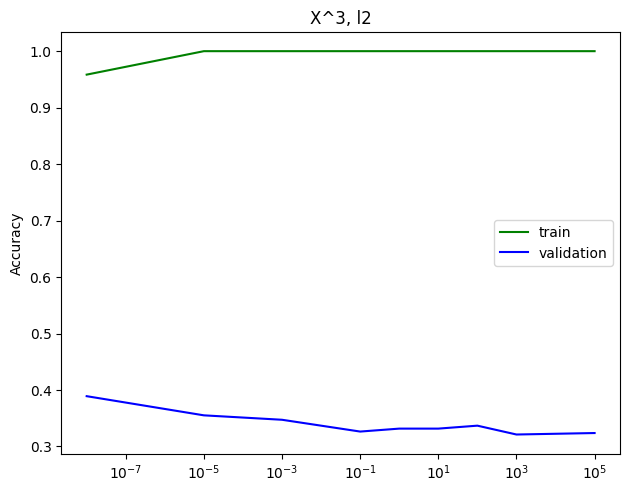

In [140]:
plt.plot(c, trainAcc2_l2, label='train', color='g')
plt.plot(c, valAcc2_l2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^3, l2')
plt.legend()

## 1.4) Optimal set up

the optimal set up for logistic regression based on previous results is the normal features with l1 regularization with a regularization parameter C=10

In [141]:
X_test_opt = X_scale.transform(X_test)

In [143]:
opt_log = LogisticRegression(penalty='l1', C=10, solver='liblinear', max_iter=200)
opt_log.fit(X_train1, y_train)
print("'Optimal' Accuracy on test set:", opt_log.score(X_test_opt, y_test))

'Optimal' Accuracy on test set: 0.34


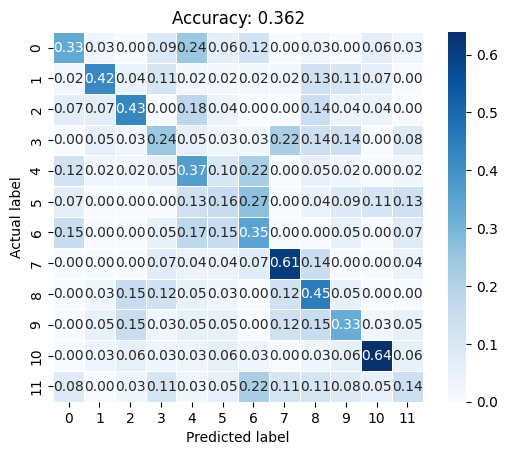

In [191]:
y_pred = opt_log.predict(X_test_opt)
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap=plt.cm.Blues, linewidths=0.5, square=True)
plt.title('Accuracy: {:.3f}'.format(acc_score))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 2) SVM

#### changed image size to 64*64 to reduce run time for SVM and NN

In [18]:
size = (64,64)
# used once to add first image to the list
counter = 0
# lists for features and corresponding values
X2 = []
y2 = np.array([])

In [20]:
# loading data into arrays
for sample in samples:
    files = os.listdir(path + sample)
    ind = samples.index(sample)
    for i in range(sample_per_plant):
        if not files[i].endswith('.png'):
            continue
        im = Image.open(path + sample + '/' + files[i]).resize(size)
        if not counter:
            X2 = [np.asarray( im, dtype="int32" )[:,:,:3].flatten()]
            counter = 1
        else:
            X2 = np.append(X2, [np.asarray( im, dtype="int32" )[:,:,:3].flatten()], axis=0)
        y2 = np.append(y2, ind)
        im.close()

In [22]:
# scaler for the features
X_scale = StandardScaler().fit(X2)

X_train_val, X_test, y_train_val, y_test = train_test_split(X2, y2, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15)
# normal features
X_train1 = X_scale.transform(X_train)
X_val1 = X_scale.transform(X_val)
# squared features
X_train2 = np.square(X_train)
X_train2 = X_scale.transform(X_train2)
X_val2 = np.square(X_val)
X_val2 = X_scale.transform(X_val2)
# cubical features
X_train3 = X_train**3
X_train3 = X_scale.transform(X_train3)
X_val3 = X_val**3
X_val3 = X_scale.transform(X_val3)

## 2.1) Regular features

### linear

In [23]:
trainAcc4_lin = []
valAcc4_lin = []

In [ ]:
for i in c:
    svm1 = SVC(kernel='linear', C=i, max_iter = 200)
    svm1.fit(X_train1, y_train)
    trainAcc4_lin.append(svm1.score(X_train1, y_train))
    valAcc4_lin.append(svm1.score(X_val1, y_val))

In [93]:
print(trainAcc4_lin)
print(valAcc4_lin)

[0.08956602031394276, 0.33518005540166207, 0.984302862419206, 0.9815327793167128, 0.9815327793167128, 0.9815327793167128, 0.9815327793167128, 0.9815327793167128, 0.9815327793167128, 0.9815327793167128]
[0.08616187989556136, 0.22193211488250653, 0.48825065274151436, 0.4830287206266319, 0.4830287206266319, 0.4830287206266319, 0.4830287206266319, 0.4830287206266319, 0.4830287206266319, 0.4830287206266319]


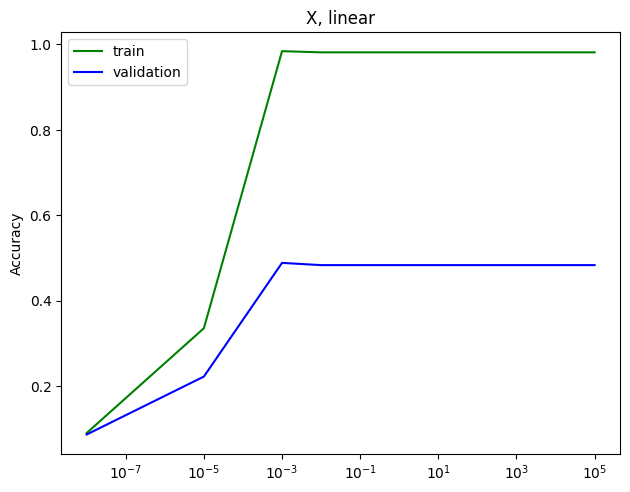

In [27]:
plt.plot(c, trainAcc4_lin, label='train', color='g')
plt.plot(c, valAcc4_lin, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X, linear')
plt.legend()

### polynomial

In [94]:
trainAcc4_poly = []
valAcc4_poly = []

In [ ]:
for i in c:
    svm2 = SVC(kernel='poly', C=i, max_iter = 200)
    svm2.fit(X_train1, y_train)
    trainAcc4_poly.append(svm2.score(X_train1, y_train))
    valAcc4_poly.append(svm2.score(X_val1, y_val))

In [96]:
print(trainAcc4_poly)
print(valAcc4_poly)

[0.08956602031394276, 0.08956602031394276, 0.0909510618651893, 0.11588180978762697, 0.22437673130193905, 0.4362880886426593, 0.8679593721144968, 0.8873499538319483, 0.8878116343490304, 0.8878116343490304]
[0.08616187989556136, 0.08616187989556136, 0.08616187989556136, 0.09660574412532637, 0.10182767624020887, 0.1174934725848564, 0.28720626631853785, 0.30548302872062666, 0.3028720626631854, 0.3028720626631854]


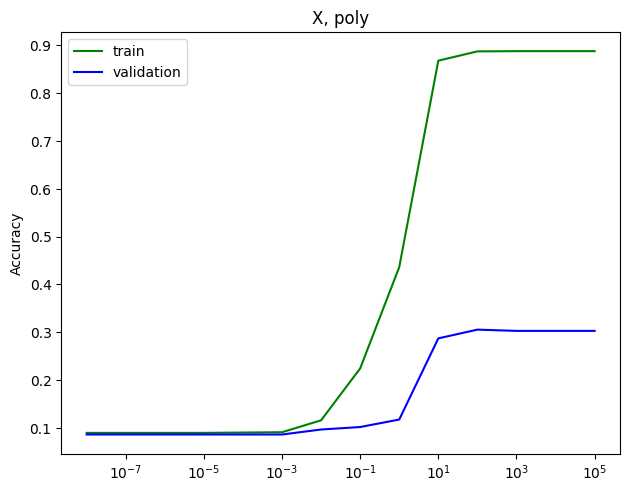

In [97]:
plt.plot(c, trainAcc4_poly, label='train', color='g')
plt.plot(c, valAcc4_poly, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X, poly')
plt.legend()

### rbf

In [98]:
trainAcc4_rbf = []
valAcc4_rbf = []

In [ ]:
for i in c:
    svm3 = SVC(kernel='rbf', C=i, max_iter = 200)
    svm3.fit(X_train1, y_train)
    trainAcc4_rbf.append(svm3.score(X_train1, y_train))
    valAcc4_rbf.append(svm3.score(X_val1, y_val))

In [100]:
print(trainAcc4_rbf)
print(valAcc4_rbf)

[0.08956602031394276, 0.08956602031394276, 0.08956602031394276, 0.08956602031394276, 0.16943674976915973, 0.9136657433056325, 1.0, 1.0, 1.0, 1.0]
[0.08616187989556136, 0.08616187989556136, 0.08616187989556136, 0.08616187989556136, 0.17232375979112272, 0.4934725848563969, 0.5352480417754569, 0.5352480417754569, 0.5352480417754569, 0.5352480417754569]


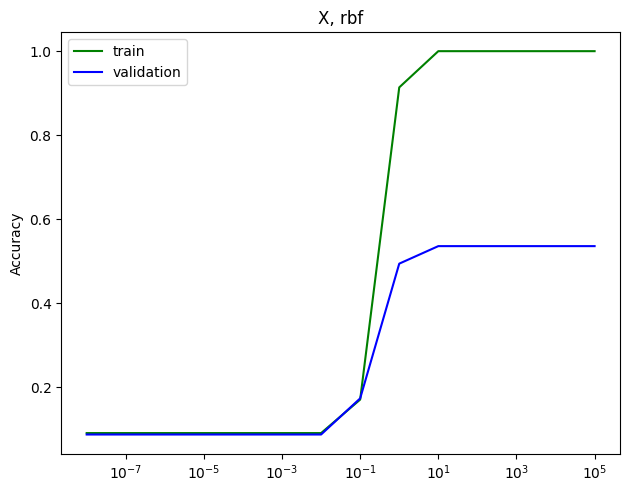

In [101]:
plt.plot(c, trainAcc4_rbf, label='train', color='g')
plt.plot(c, valAcc4_rbf, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X, rbf')
plt.legend()

## 2.2) squared data

### linear

In [102]:
trainAcc5_lin = []
valAcc5_lin = []

In [103]:
for i in c:
    svm1_2 = SVC(kernel='linear', C=i, max_iter = 200)
    svm1_2.fit(X_train2, y_train)
    trainAcc5_lin.append(svm1_2.score(X_train2, y_train))
    valAcc5_lin.append(svm1_2.score(X_val2, y_val))

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).

In [104]:
print(trainAcc5_lin)
print(valAcc5_lin)

[0.884118190212373, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573, 0.9570637119113573]
[0.39425587467362927, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817, 0.3785900783289817]


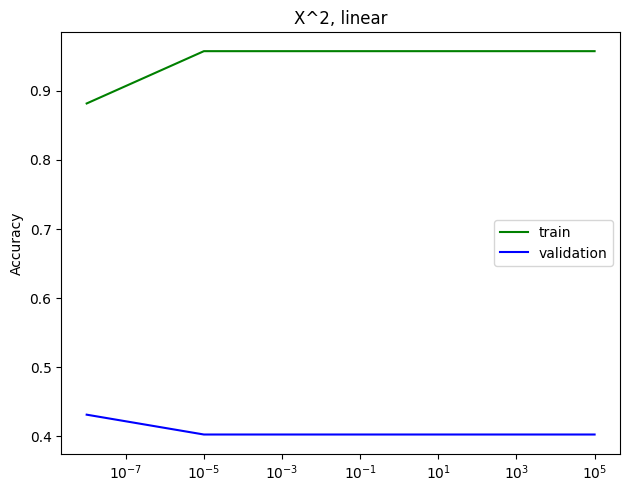

In [161]:
plt.plot(c, trainAcc5_lin, label='train', color='g')
plt.plot(c, valAcc5_lin, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^2, linear')
plt.legend()

### polynomial

In [105]:
trainAcc5_poly = []
valAcc5_poly = []

In [ ]:
for i in c:
    svm2_2 = SVC(kernel='poly', C=i, max_iter = 100)
    svm2_2.fit(X_train2, y_train)
    trainAcc5_poly.append(svm2_2.score(X_train2, y_train))
    valAcc5_poly.append(svm2_2.score(X_val2, y_val))

In [107]:
print(trainAcc5_poly)
print(valAcc5_poly)

[0.09695290858725762, 0.09695290858725762, 0.09695290858725762, 0.09372114496768236, 0.12557710064635272, 0.35964912280701755, 0.5946445060018467, 0.5844875346260388, 0.5844875346260388, 0.5844875346260388]
[0.10704960835509138, 0.10704960835509138, 0.10443864229765012, 0.10966057441253264, 0.1279373368146214, 0.2402088772845953, 0.29765013054830286, 0.3002610966057441, 0.3002610966057441, 0.3002610966057441]


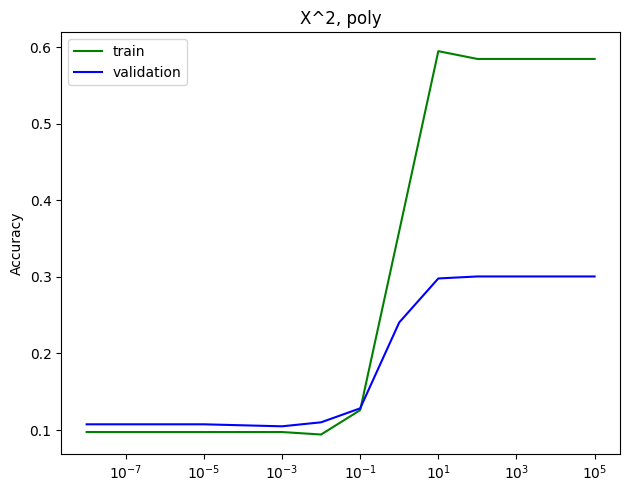

In [108]:
plt.plot(c, trainAcc5_poly, label='train', color='g')
plt.plot(c, valAcc5_poly, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^2, poly')
plt.legend()

### rbf

In [110]:
trainAcc5_rbf = []
valAcc5_rbf = []

In [ ]:
for i in c:
    svm3_2 = SVC(kernel='rbf', C=i, max_iter = 100)
    svm3_2.fit(X_train2, y_train)
    trainAcc5_rbf.append(svm3_2.score(X_train2, y_train))
    valAcc5_rbf.append(svm3_2.score(X_val2, y_val))

In [112]:
print(trainAcc5_rbf)
print(valAcc5_rbf)

[0.1731301939058172, 0.1731301939058172, 0.17174515235457063, 0.17174515235457063, 0.19436749769159742, 0.6583564173591875, 0.9289012003693444, 0.9256694367497692, 0.9256694367497692, 0.9256694367497692]
[0.17754569190600522, 0.17754569190600522, 0.1801566579634465, 0.17232375979112272, 0.18276762402088773, 0.34464751958224543, 0.4516971279373368, 0.4490861618798956, 0.4490861618798956, 0.4490861618798956]


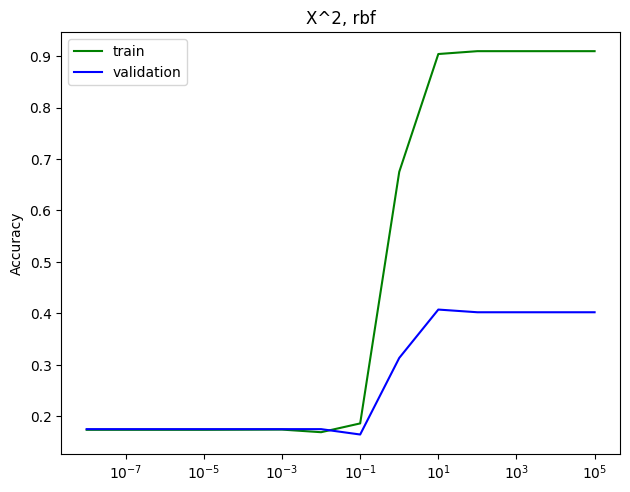

In [164]:
plt.plot(c, trainAcc5_rbf, label='train', color='g')
plt.plot(c, valAcc5_rbf, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('X^2, rbf')
plt.legend()

## Optimal set up

The optimal set up for SVM is applying rbf kernel on to the normal features with C >= 10 based on my observations

In [65]:
X_test_opt = X_scale.transform(X_test)

In [66]:
opt_svm = SVC(kernel='rbf', C=10, max_iter = 200)
opt_svm.fit(X_train1, y_train)
print("'Optimal' Accuracy on test set:", opt_svm.score(X_test_opt, y_test))

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


'Optimal' Accuracy on test set: 0.4266666666666667


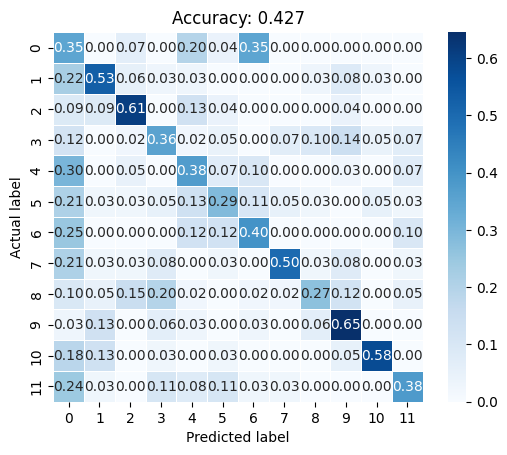

In [67]:
y_pred = opt_svm.predict(X_test_opt)
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap=plt.cm.Blues, linewidths=0.5, square=True)
plt.title('Accuracy: {:.3f}'.format(acc_score))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 3) Neural Network


## 3.1) hidden layer = (200)

In [28]:
h1 = (200)

### relu


In [29]:
trainAcc_nn_r1 = []
valAcc_nn_r1 = []

In [30]:
for i in c:
    nn1_r = MLPClassifier(hidden_layer_sizes=h1, activation='relu', solver='adam', max_iter=200, alpha=i)
    nn1_r.fit(X_train1, y_train)
    trainAcc_nn_r1.append(nn1_r.score(X_train1, y_train))
    valAcc_nn_r1.append(nn1_r.score(X_val1, y_val))

In [80]:
print(trainAcc_nn_r1)
print(valAcc_nn_r1)

[1.0, 1.0, 1.0, 0.9921514312096029, 1.0, 0.9963065558633426, 0.9796860572483841, 0.5175438596491229, 0.08956602031394276, 0.08956602031394276]
[0.4386422976501306, 0.45430809399477806, 0.45691906005221933, 0.3785900783289817, 0.4960835509138381, 0.46475195822454307, 0.4490861618798956, 0.3968668407310705, 0.08616187989556136, 0.08616187989556136]


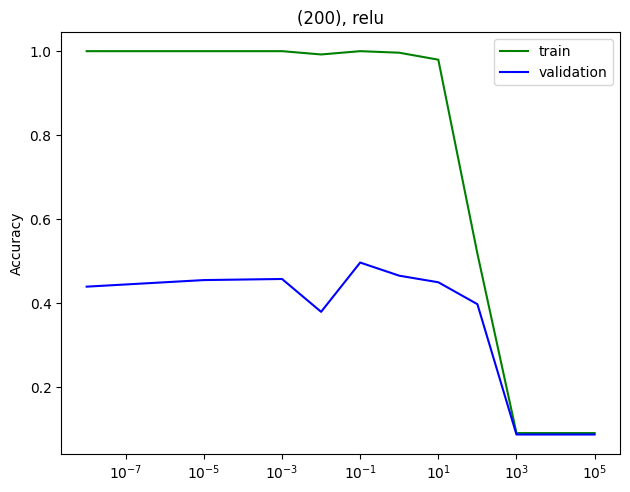

In [31]:
plt.plot(c, trainAcc_nn_r1, label='train', color='g')
plt.plot(c, valAcc_nn_r1, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(200), relu')
plt.legend()

### sigmoid

In [32]:
trainAcc_nn_s1 = []
valAcc_nn_s1 = []

In [33]:
for i in c:
    nn1_s = MLPClassifier(hidden_layer_sizes=h1, activation='logistic', solver='adam', max_iter=200, alpha=i)
    nn1_s.fit(X_train1, y_train)
    trainAcc_nn_s1.append(nn1_s.score(X_train1, y_train))
    valAcc_nn_s1.append(nn1_s.score(X_val1, y_val))

In [79]:
print(trainAcc_nn_s1)
print(valAcc_nn_s1)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9963065558633426, 0.7576177285318559, 0.14496768236380425, 0.08956602031394276, 0.08956602031394276]
[0.46736292428198434, 0.4595300261096606, 0.4595300261096606, 0.4516971279373368, 0.4490861618798956, 0.4464751958224543, 0.4595300261096606, 0.14882506527415143, 0.08616187989556136, 0.08616187989556136]


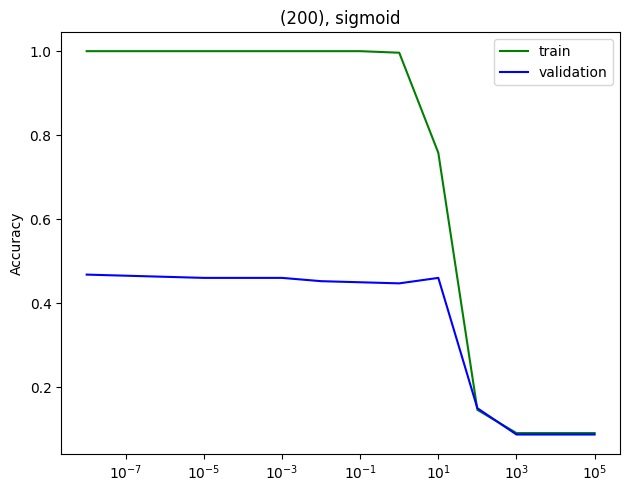

In [34]:
plt.plot(c, trainAcc_nn_s1, label='train', color='g')
plt.plot(c, valAcc_nn_s1, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(200), sigmoid')
plt.legend()

### tanh

In [35]:
trainAcc_nn_t1 = []
valAcc_nn_t1 = []

In [36]:
for i in c:
    nn1_t = MLPClassifier(hidden_layer_sizes=h1, activation='tanh', solver='adam', max_iter=200, alpha=i)
    nn1_t.fit(X_train1, y_train)
    trainAcc_nn_t1.append(nn1_t.score(X_train1, y_train))
    valAcc_nn_t1.append(nn1_t.score(X_val1, y_val))

In [78]:
print(trainAcc_nn_t1)
print(valAcc_nn_t1)

[1.0, 1.0, 1.0, 1.0, 0.9732225300092336, 0.9986149584487535, 0.9289012003693444, 0.4275161588180979, 0.08956602031394276, 0.08956602031394276]
[0.4516971279373368, 0.45430809399477806, 0.4621409921671018, 0.4516971279373368, 0.39947780678851175, 0.4464751958224543, 0.45430809399477806, 0.3368146214099217, 0.08616187989556136, 0.08616187989556136]


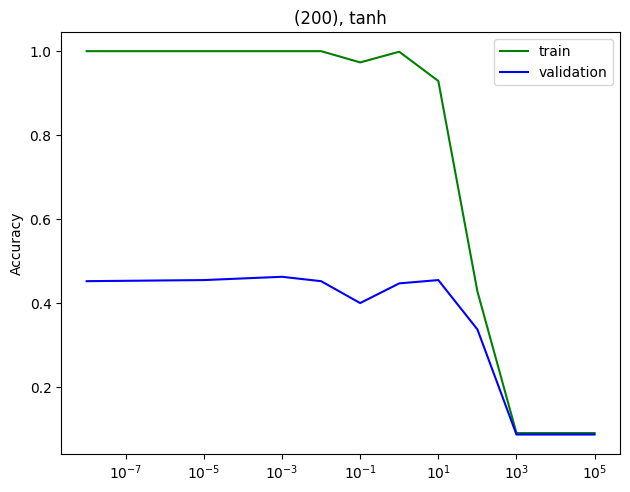

In [37]:
plt.plot(c, trainAcc_nn_t1, label='train', color='g')
plt.plot(c, valAcc_nn_t1, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(200), tanh')
plt.legend()

## 3.2) hidden layer = (400,200)

In [38]:
h2 = (400, 200)

### relu

In [39]:
trainAcc_nn_r2 = []
valAcc_nn_r2 = []

In [40]:
for i in c:
    nn2_r = MLPClassifier(hidden_layer_sizes=h2, activation='relu', solver='adam', max_iter=200, alpha=i)
    nn2_r.fit(X_train1, y_train)
    trainAcc_nn_r2.append(nn2_r.score(X_train1, y_train))
    valAcc_nn_r2.append(nn2_r.score(X_val1, y_val))

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [76]:
print(trainAcc_nn_r2)
print(valAcc_nn_r2)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9986149584487535, 0.9607571560480148, 0.17174515235457063, 0.08956602031394276, 0.08956602031394276]
[0.4804177545691906, 0.4830287206266319, 0.47780678851174935, 0.4908616187989556, 0.5091383812010444, 0.5143603133159269, 0.4830287206266319, 0.16971279373368145, 0.08616187989556136, 0.08616187989556136]


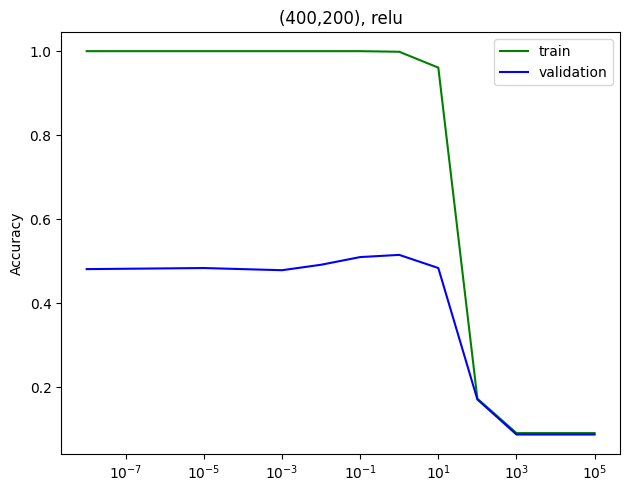

In [41]:
plt.plot(c, trainAcc_nn_r2, label='train', color='g')
plt.plot(c, valAcc_nn_r2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(400,200), relu')
plt.legend()

### sigmoid


In [42]:
trainAcc_nn_s2 = []
valAcc_nn_s2 = []

In [43]:
for i in c:
    nn2_s = MLPClassifier(hidden_layer_sizes=h2, activation='logistic', solver='adam', max_iter=200, alpha=i)
    nn2_s.fit(X_train1, y_train)
    trainAcc_nn_s2.append(nn2_s.score(X_train1, y_train))
    valAcc_nn_s2.append(nn2_s.score(X_val1, y_val))

In [75]:
print(trainAcc_nn_s2)
print(valAcc_nn_s2)

[1.0, 1.0, 1.0, 0.9981532779316713, 1.0, 0.9838411819021238, 0.2691597414589104, 0.08956602031394276, 0.08956602031394276, 0.08956602031394276]
[0.4412532637075718, 0.4804177545691906, 0.4830287206266319, 0.4255874673629243, 0.4464751958224543, 0.4751958224543081, 0.2819843342036554, 0.08616187989556136, 0.08616187989556136, 0.08616187989556136]


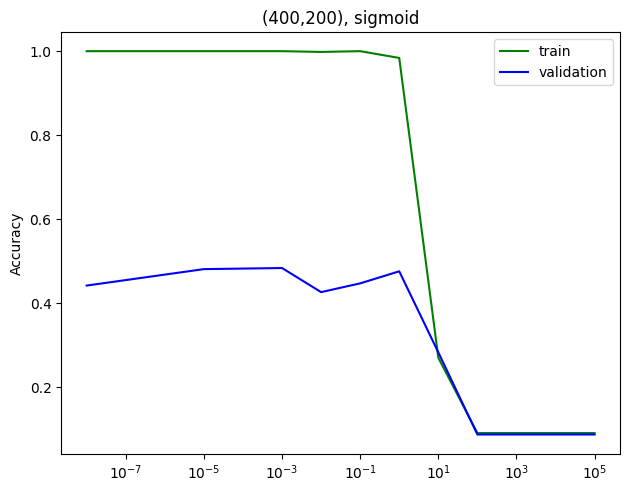

In [44]:
plt.plot(c, trainAcc_nn_s2, label='train', color='g')
plt.plot(c, valAcc_nn_s2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(400,200), sigmoid')
plt.legend()

### tanh

In [45]:
trainAcc_nn_t2 = []
valAcc_nn_t2 = []

In [46]:
for i in c:
    nn2_t = MLPClassifier(hidden_layer_sizes=h2, activation='tanh', solver='adam', max_iter=200, alpha=i)
    nn2_t.fit(X_train1, y_train)
    trainAcc_nn_t2.append(nn2_t.score(X_train1, y_train))
    valAcc_nn_t2.append(nn2_t.score(X_val1, y_val))

In [74]:
print(trainAcc_nn_t2)
print(valAcc_nn_t2)

[1.0, 1.0, 1.0, 1.0, 0.9903047091412742, 0.9939981532779316, 0.8896583564173592, 0.1814404432132964, 0.08956602031394276, 0.08956602031394276]
[0.4490861618798956, 0.4516971279373368, 0.4725848563968668, 0.4751958224543081, 0.3968668407310705, 0.43342036553524804, 0.48825065274151436, 0.1801566579634465, 0.08616187989556136, 0.08616187989556136]


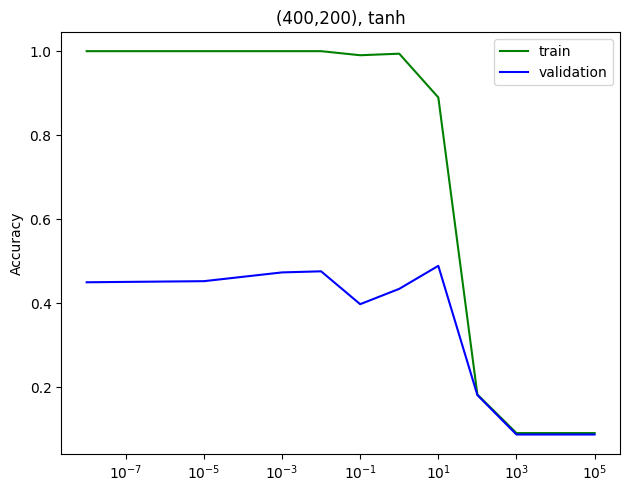

In [48]:
plt.plot(c, trainAcc_nn_t2, label='train', color='g')
plt.plot(c, valAcc_nn_t2, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(400,200), tanh')
plt.legend()

## 3.2) hidden layer = (600,400,200)

In [51]:
h3 = (600, 400, 200)

### relu

In [52]:
trainAcc_nn_r3 = []
valAcc_nn_r3 = []

In [53]:
for i in c:
    nn3_r = MLPClassifier(hidden_layer_sizes=h3, activation='relu', solver='adam', max_iter=200, alpha=i)
    nn3_r.fit(X_train1, y_train)
    trainAcc_nn_r3.append(nn3_r.score(X_train1, y_train))
    valAcc_nn_r3.append(nn3_r.score(X_val1, y_val))

In [69]:
print(trainAcc_nn_r3)
print(valAcc_nn_r3)

[1.0, 0.9566020313942751, 0.9916897506925207, 0.984302862419206, 0.9792243767313019, 0.9976915974145891, 0.9233610341643582, 0.08956602031394276, 0.08956602031394276, 0.08956602031394276]
[0.47780678851174935, 0.391644908616188, 0.4490861618798956, 0.45430809399477806, 0.42297650130548303, 0.49869451697127937, 0.4725848563968668, 0.08616187989556136, 0.08616187989556136, 0.08616187989556136]


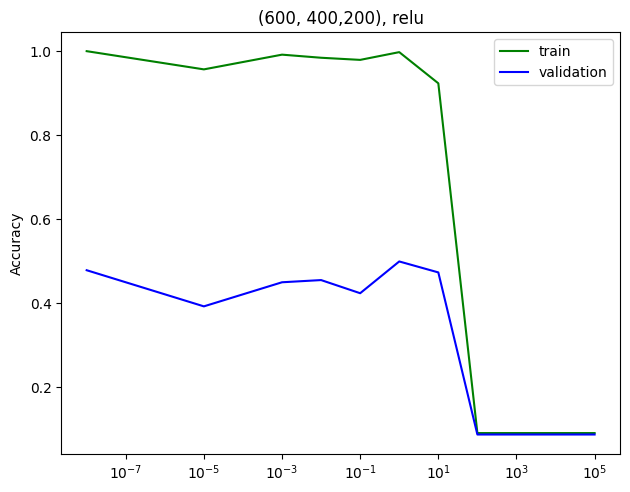

In [57]:
plt.plot(c, trainAcc_nn_r3, label='train', color='g')
plt.plot(c, valAcc_nn_r3, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(600, 400,200), relu')
plt.legend()

### sigmoid

In [58]:
trainAcc_nn_s3 = []
valAcc_nn_s3 = []

In [59]:
for i in c:
    nn3_s = MLPClassifier(hidden_layer_sizes=h3, activation='logistic', solver='adam', max_iter=200, alpha=i)
    nn3_s.fit(X_train1, y_train)
    trainAcc_nn_s3.append(nn3_s.score(X_train1, y_train))
    valAcc_nn_s3.append(nn3_s.score(X_val1, y_val))

In [71]:
print(trainAcc_nn_s3)
print(valAcc_nn_s3)

[1.0, 1.0, 1.0, 0.9806094182825484, 0.9995383194829178, 0.9593721144967683, 0.08956602031394276, 0.08956602031394276, 0.08956602031394276, 0.08956602031394276]
[0.4516971279373368, 0.4516971279373368, 0.47780678851174935, 0.4464751958224543, 0.46736292428198434, 0.402088772845953, 0.08616187989556136, 0.08616187989556136, 0.08616187989556136, 0.08616187989556136]


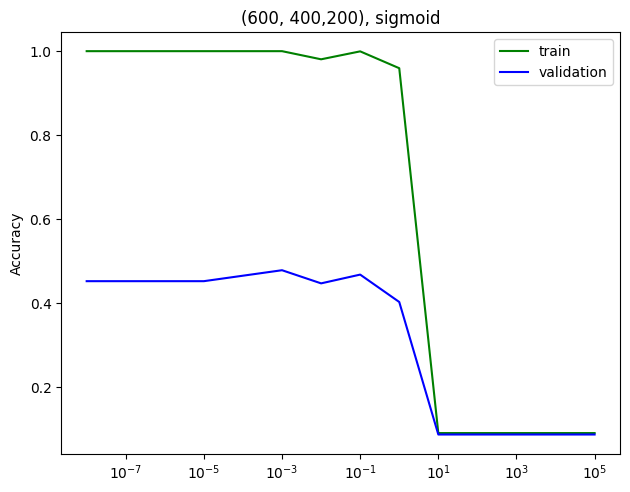

In [60]:
plt.plot(c, trainAcc_nn_s3, label='train', color='g')
plt.plot(c, valAcc_nn_s3, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(600, 400,200), sigmoid')
plt.legend()

### tanh

In [61]:
trainAcc_nn_t3 = []
valAcc_nn_t3 = []

In [62]:
for i in c:
    nn3_t = MLPClassifier(hidden_layer_sizes=h3, activation='tanh', solver='adam', max_iter=200, alpha=i)
    nn3_t.fit(X_train1, y_train)
    trainAcc_nn_t3.append(nn3_t.score(X_train1, y_train))
    valAcc_nn_t3.append(nn3_t.score(X_val1, y_val))

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
print(trainAcc_nn_t3)
print(valAcc_nn_t3)

[1.0, 1.0, 1.0, 1.0, 0.9695290858725761, 0.9815327793167128, 0.8305632502308402, 0.08956602031394276, 0.08956602031394276, 0.08956602031394276]
[0.4804177545691906, 0.4960835509138381, 0.4595300261096606, 0.4856396866840731, 0.45430809399477806, 0.38642297650130547, 0.45691906005221933, 0.08616187989556136, 0.08616187989556136, 0.08616187989556136]


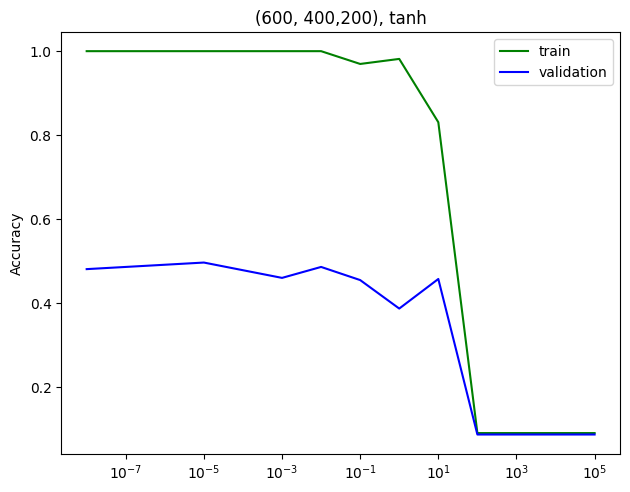

In [73]:
plt.plot(c, trainAcc_nn_t3, label='train', color='g')
plt.plot(c, valAcc_nn_t3, label='validation', color='b')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title('(600, 400,200), tanh')
plt.legend()

## Optimal set up

The optimal set up is using relu activation function with two hidden layer of (400, 200) and alpha(L2 regularization strength) of 1

In [89]:
opt_nn = MLPClassifier(hidden_layer_sizes=h2, activation='relu', solver='adam', max_iter=200, alpha=1)
opt_nn.fit(X_train1, y_train)
print("'Optimal' Accuracy on test set:", opt_nn.score(X_test_opt, y_test))

'Optimal' Accuracy on test set: 0.41333333333333333


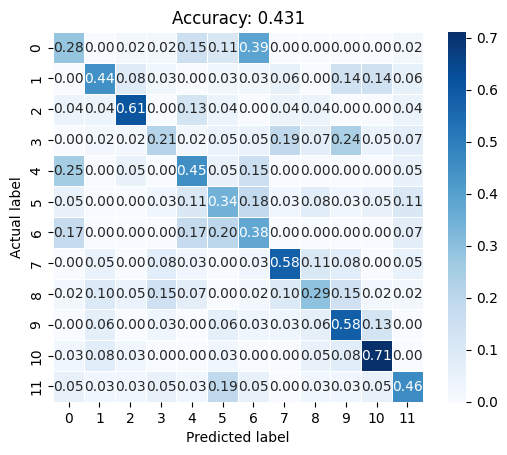

In [86]:
y_pred = opt_nn.predict(X_test_opt)
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap=plt.cm.Blues, linewidths=0.5, square=True)
plt.title('Accuracy: {:.3f}'.format(acc_score))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()